In [1]:
%pylab inline
from numpy import exp, dot, linspace, power, eye, array, sin, cos, pi, diag, log, sum, sqrt
from numpy.linalg import norm, solve, inv, svd, cholesky
from matplotlib.pylab import plt, scatter

Populating the interactive namespace from numpy and matplotlib


In [56]:
def covariance( x_1, x_2 ):
    # Squared Exponential covariance function
    l = 6.4 # length-scale parameter
    return exp( - power(norm(x_1 - x_2)/l, 2  ) * 0.5 )

def feature(x):
    return array( [ 1, (x+5)*(x+10)/2, x] )
    #return array( [1, sin(x), cos(x)] )

def equivKer(x, xlist):
    x_feature = array( [feature(xi) for xi in xlist] )
    ker = array( [covariance(feature(x), x_i) for x_i in x_feature] )
    weighted_ker = ker / sum(ker)
    return weighted_ker

## 生成訓練集

In [42]:
x = linspace(0, 2*pi, 5)
y = cos(x)

# Modeling: Parameters estimation

In [35]:
noise_level = 0

# Prediction

In [57]:
x_star = linspace(0, 2*pi, 1000)
y_star = linspace(0, 2*pi, 1000)
for i in range(1000):
    y_star[i] = dot( equivKer(x_star[i], x), y )

# Visualization

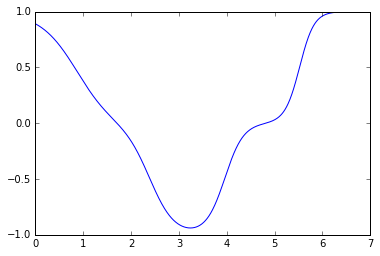

In [58]:
plt.plot(x_star, y_star)
#plt.plot(x_star, y_star+100*diag(var_star))
#plt.plot(x_star, y_star-100*diag(var_star))
#plt.plot(x_star, sin(x_star))
#for i in range(x.size):
    #plt.scatter( x[i], y[i] )
plt.show()